In [6]:
%pip install mediapipe

Note: you may need to restart the kernel to use updated packages.


In [5]:
%pip install tensorflow==2.16.1

  Using cached tensorflow-2.16.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.3 kB)
  Using cached ml_dtypes-0.3.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
  Using cached tensorboard-2.16.2-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.3.2-py3-none-any.whl.metadata (5.7 kB)
Using cached tensorflow-2.16.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (589.8 MB)
Using cached keras-3.3.2-py3-none-any.whl (1.1 MB)
Using cached ml_dtypes-0.3.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.2 MB)
Using cached tensorboard-2.16.2-py3-none-any.whl (5.5 MB)
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting u

In [1]:
import cv2
import itertools
import numpy as np
from time import time
import mediapipe as mp
import matplotlib.pyplot as plt

2024-04-26 16:25:25.530255: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-26 16:25:25.557049: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-26 16:25:25.975312: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Initialize the mediapipe face detection class.
mp_face_detection = mp.solutions.face_detection

# Setup the face detection function.
face_detection = mp_face_detection.FaceDetection(model_selection=0, min_detection_confidence=0.5)

# Initialize the mediapipe drawing class.
mp_drawing = mp.solutions.drawing_utils

I0000 00:00:1714130729.669576  127997 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1714130729.685872  128071 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 NVIDIA 550.67), renderer: NVIDIA GeForce RTX 3070/PCIe/SSE2
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


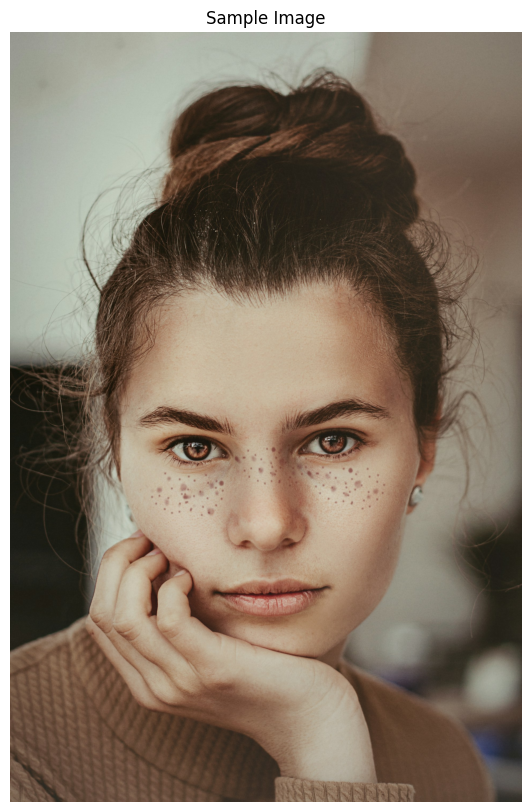

In [127]:
# Read an image from the specified path.
sample_img = cv2.imread('media/sample.jpg')

# Specify a size of the figure.
plt.figure(figsize = [10, 10])

# Display the sample image, also convert BGR to RGB for display. 
plt.title("Sample Image");plt.axis('off');plt.imshow(sample_img[:,:,::-1]);plt.show()

In [137]:
face_detection_results = face_detection.process(sample_img[:,:,::-1])

if face_detection_results.detections:
    for face_no, face in enumerate(face_detection_results.detections):
        print(f'FACE NUMBER: {face_no+1}')
        print(f'--------------------------')
        print(f'FACE CONFIDENCE: {round(face.score[0], 2)}')
        face_data = face.location_data
        print(f'\nFACE BOUNDING BOX:\n{face_data.relative_bounding_box}')
        for i in range(len(mp_face_detection.FaceKeyPoint)):
            print(f'{mp_face_detection.FaceKeyPoint(i).name}:')
            print(f'{face_data.relative_keypoints[mp_face_detection.FaceKeyPoint(i).value]}') 

FACE NUMBER: 1
--------------------------
FACE CONFIDENCE: 0.9

FACE BOUNDING BOX:
xmin: 0.20811060070991516
ymin: 0.4036215543746948
width: 0.6279371976852417
height: 0.41740113496780396

RIGHT_EYE:
x: 0.3723723888397217
y: 0.5446819067001343

LEFT_EYE:
x: 0.6294801235198975
y: 0.5387488603591919

NOSE_TIP:
x: 0.4941449761390686
y: 0.6629289388656616

MOUTH_CENTER:
x: 0.5066980719566345
y: 0.7278081178665161

RIGHT_EAR_TRAGION:
x: 0.25872933864593506
y: 0.5569332838058472

LEFT_EAR_TRAGION:
x: 0.7881352305412292
y: 0.5430986881256104



In [138]:
import cv2
im = cv2.imread('media/sample.jpg')
print(im.shape)

(2888, 1920, 3)


0.372372388839721 0.5446819067001343
0.629480123519897 0.5387488603591919
0.494144976139068 0.6629289388656616
0.506698071956634 0.7278081178665161
0.258729338645935 0.5569332838058472
0.788135230541229 0.5430986881256104


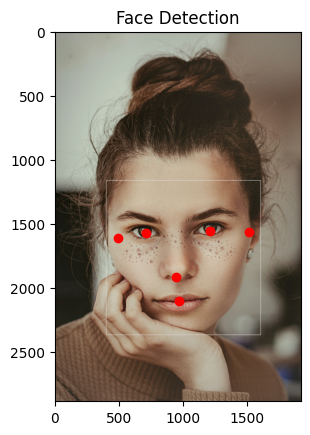

In [140]:
img_copy = sample_img[:,:,::-1].copy()
if face_detection_results.detections:
    for face_no, face in enumerate(face_detection_results.detections):
        mp_drawing.draw_detection(img_copy, face, 
                                 keypoint_drawing_spec=mp_drawing.DrawingSpec(color=(255, 0, 0),
                                                                              thickness=2,
                                                                              circle_radius=2))
        
plt.title("Face Detection")
plt.axis('on')
plt.imshow(img_copy)
for face_no, face in enumerate(face_detection_results.detections):
    for i in range(len(mp_face_detection.FaceKeyPoint)):
        x = float(str(face_data.relative_keypoints[mp_face_detection.FaceKeyPoint(i)])[3:20])
        y = float(str(face_data.relative_keypoints[mp_face_detection.FaceKeyPoint(i)])[26:])
        plt.plot(x*im.shape[1], y*im.shape[0], marker='o', color="red") 
        print(x, y)
plt.show()

In [18]:
# Initialize the mediapipe face mesh class.
mp_face_mesh = mp.solutions.face_mesh

# Setup the face landmarks function for images.
face_mesh_images = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=2,
                                         min_detection_confidence=0.5)

# Setup the face landmarks function for videos.
face_mesh_videos = mp_face_mesh.FaceMesh(static_image_mode=False, max_num_faces=2, 
                                         min_detection_confidence=0.5,min_tracking_confidence=0.3)

# Initialize the mediapipe drawing styles class.
mp_drawing_styles = mp.solutions.drawing_styles

I0000 00:00:1714132247.402272  127997 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1714132247.417945  128476 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 NVIDIA 550.67), renderer: NVIDIA GeForce RTX 3070/PCIe/SSE2
I0000 00:00:1714132247.425388  127997 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1714132247.437631  128498 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 NVIDIA 550.67), renderer: NVIDIA GeForce RTX 3070/PCIe/SSE2


In [142]:
# Perform face landmarks detection after converting the image into RGB format.
face_mesh_results = face_mesh_images.process(sample_img[:,:,::-1])

# Get the list of indexes of the left and right eye.
LEFT_EYE_INDEXES = list(set(itertools.chain(*mp_face_mesh.FACEMESH_LEFT_EYE)))
RIGHT_EYE_INDEXES = list(set(itertools.chain(*mp_face_mesh.FACEMESH_RIGHT_EYE)))
LIPS_INDEXES = list(set(itertools.chain(*mp_face_mesh.FACEMESH_LIPS)))

# Check if facial landmarks are found.
if face_mesh_results.multi_face_landmarks:
    
    # Iterate over the found faces.
    for face_no, face_landmarks in enumerate(face_mesh_results.multi_face_landmarks):
        
        # Display the face number upon which we are iterating upon.
        print(f'FACE NUMBER: {face_no+1}')
        print('-----------------------')
        
        # Display the face part name i.e., left eye whose landmarks we are gonna display.
        print(f'LEFT EYE LANDMARKS:\n')
        
        # Iterate over the first two landmarks indexes of the left eye.
        for LEFT_EYE_INDEX in LEFT_EYE_INDEXES[:9]:
            
            # Display the found normalized landmarks of the left eye.
            print(face_landmarks.landmark[LEFT_EYE_INDEX])
        
        # Display the face part name i.e., right eye whose landmarks we are gonna display.
        print(f'RIGHT EYE LANDMARKS:\n')
        
        # Iterate over the first two landmarks indexes of the right eye.
        for RIGHT_EYE_INDEX in RIGHT_EYE_INDEXES[:9]:
            
            # Display the found normalized landmarks of the right eye.
            print(face_landmarks.landmark[RIGHT_EYE_INDEX])
        
        # Display the face part name i.e., right eye whose landmarks we are gonna display.
        print(f'LIPS LANDMARKS:\n')
        
        # Iterate over the first two landmarks indexes of the right eye.
        for LIPS_INDEX in LIPS_INDEXES[:7]:
            
            # Display the found normalized landmarks of the right eye.
            print(face_landmarks.landmark[LIPS_INDEX])

FACE NUMBER: 1
-----------------------
LEFT EYE LANDMARKS:

x: 0.5884677767753601
y: 0.5289735794067383
z: -0.03222684934735298

x: 0.6114137768745422
y: 0.5211724638938904
z: -0.0388559028506279

x: 0.6352399587631226
y: 0.5190240144729614
z: -0.03902915492653847

x: 0.6587244272232056
y: 0.5209641456604004
z: -0.03372802212834358

x: 0.6725422739982605
y: 0.52513587474823
z: -0.02515176497399807

x: 0.6639639139175415
y: 0.5409775376319885
z: -0.016473740339279175

x: 0.6860548853874207
y: 0.530229389667511
z: -0.005381677765399218

x: 0.5662204027175903
y: 0.544657826423645
z: -0.018537143245339394

x: 0.5729948282241821
y: 0.5390266180038452
z: -0.024862300604581833

RIGHT EYE LANDMARKS:

x: 0.3298536539077759
y: 0.5308850407600403
z: -0.00798922311514616

x: 0.3079279065132141
y: 0.5412129759788513
z: 0.02425610087811947

x: 0.3178364336490631
y: 0.5356832146644592
z: 0.002301223808899522

x: 0.3286994993686676
y: 0.5504840612411499
z: 0.01037419494241476

x: 0.421680212020874
y: 

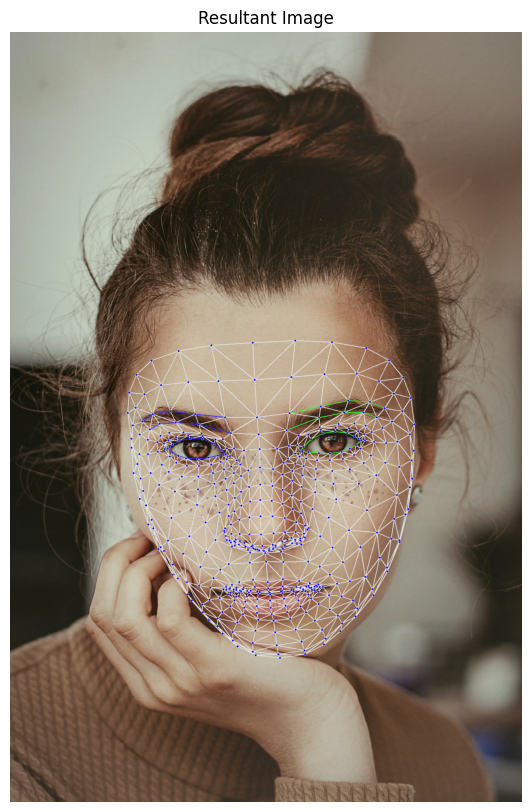

In [148]:
# Create a copy of the sample image in RGB format to draw the found facial landmarks on.
img_copy = sample_img[:,:,::-1].copy()

# Check if facial landmarks are found.
if face_mesh_results.multi_face_landmarks:
    
    # Iterate over the found faces.
    for face_landmarks in face_mesh_results.multi_face_landmarks:
        
        # Draw the facial landmarks on the copy of the sample image with the
        # face mesh tesselation connections using default face mesh tesselation style.
        mp_drawing.draw_landmarks(image=img_copy, 
                                  landmark_list=face_landmarks,connections=mp_face_mesh.FACEMESH_TESSELATION,)
        
        # Draw the facial landmarks on the copy of the sample image with the
        # face mesh contours connections using default face mesh contours style.
        mp_drawing.draw_landmarks(image=img_copy, landmark_list=face_landmarks,connections=mp_face_mesh.FACEMESH_CONTOURS,
                                  connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_contours_style())
        
# Specify a size of the figure.
fig = plt.figure(figsize = [10, 10])

# Display the resultant image with the face mesh drawn. 
plt.title("Resultant Image")
plt.axis('off')
plt.imshow(img_copy)
plt.show()

In [3]:
def DetectFacialLandmarks(image, face_mesh_images, display):
    face_mesh_results = face_mesh_images.process(image[:,:,::-1])

    img_copy = image[:,:,::-1].copy()

    # Check if facial landmarks are found.
    if face_mesh_results.multi_face_landmarks:
        
        # Iterate over the found faces.
        for face_landmarks in face_mesh_results.multi_face_landmarks:
            
            # Draw the facial landmarks on the copy of the sample image with the
            # face mesh tesselation connections using default face mesh tesselation style.
            mp_drawing.draw_landmarks(image=img_copy, 
                                    landmark_list=face_landmarks,connections=mp_face_mesh.FACEMESH_TESSELATION,)
            
            # Draw the facial landmarks on the copy of the sample image with the
            # face mesh contours connections using default face mesh contours style.
            mp_drawing.draw_landmarks(image=img_copy, landmark_list=face_landmarks,connections=mp_face_mesh.FACEMESH_CONTOURS,
                                    connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_contours_style())
            
    if display:
        f, axarr = plt.subplots(1,2) 

        # Display the resultant image with the face mesh drawn. 
        axarr[0].imshow(image[:,:,::-1])
        axarr[1].imshow(img_copy)
        axarr[0].set_title("Original")
        axarr[1].set_title("Output")
        axarr[0].axis('off')
        axarr[1].axis('off')
        plt.show()
    else:
        return np.ascontiguousarray(img_copy[:,:,::-1], dtype=np.uint8), face_mesh_results

I0000 00:00:1714128843.856621  125721 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1714128843.868938  127539 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 NVIDIA 550.67), renderer: NVIDIA GeForce RTX 3070/PCIe/SSE2


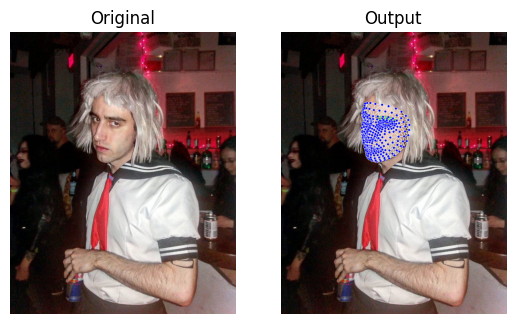

In [202]:
image = cv2.imread('media/sample_matt.jpg')
face_mesh_images = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=2,
                                         min_detection_confidence=0.5)
DetectFacialLandmarks(image, face_mesh_images, display=True)

I0000 00:00:1714129074.363212  125721 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1714129074.379287  127570 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 NVIDIA 550.67), renderer: NVIDIA GeForce RTX 3070/PCIe/SSE2


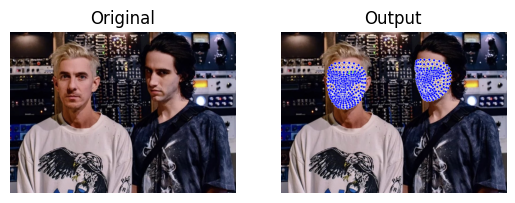

In [203]:
image = cv2.imread('media/sample_machine.jpg')
face_mesh_images = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=2,
                                         min_detection_confidence=0.5)
DetectFacialLandmarks(image, face_mesh_images, display=True)

In [11]:

from moviepy.editor import *
from collections import deque

In [19]:
def predict_on_video(video_file_path, output_file_path, SEQUENCE_LENGTH):
    '''
    This function will perform action recognition on a video using the LRCN model.
    Args:
    video_file_path:  The path of the video stored in the disk on which the action recognition is to be performed.
    output_file_path: The path where the ouput video with the predicted action being performed overlayed will be stored.
    SEQUENCE_LENGTH:  The fixed number of frames of a video that can be passed to the model as one sequence.
    '''

    # Initialize the VideoCapture object to read from the video file.
    video_reader = cv2.VideoCapture(video_file_path)
    time1 = 0

    # Get the width and height of the video.
    original_video_width = int(video_reader.get(cv2.CAP_PROP_FRAME_WIDTH))
    original_video_height = int(video_reader.get(cv2.CAP_PROP_FRAME_HEIGHT))

    # Initialize the VideoWriter Object to store the output video in the disk.
    video_writer = cv2.VideoWriter(output_file_path, cv2.VideoWriter_fourcc('M', 'P', '4', 'V'),
                                   video_reader.get(cv2.CAP_PROP_FPS), (original_video_width, original_video_height))

    # Declare a queue to store video frames.
    frames_queue = deque(maxlen = SEQUENCE_LENGTH)

    # Initialize a variable to store the predicted action being performed in the video.
    predicted_class_name = ''

    # Iterate until the video is accessed successfully.
    while video_reader.isOpened():

        # Read the frame.
        ok, frame = video_reader.read()

        # Check if frame is not read properly then break the loop.
        if not ok:
            break

        frame = cv2.flip(frame, 1)
        frame, _ = DetectFacialLandmarks(frame, face_mesh_videos, display=False)
        time2 = time()
        if (time2 - time1) > 0:
            frames_per_second = 1.0 / (time2 - time1)
            cv2.putText(frame, 'FPS: {}'.format(int(frames_per_second)), (10, 30),
                        cv2.FONT_HERSHEY_PLAIN, 2, (0, 255, 0), 3)
        time1 = time2
        video_writer.write(frame)

    # Release the VideoCapture and VideoWriter objects.
    video_reader.release()
    video_writer.release()

In [20]:
SEQUENCE_LENGTH = 20

# Get the YouTube Video's path we just downloaded.
test_videos_directory = "media"
video_title = "sample_magbay"
input_video_file_path = f'{test_videos_directory}/{video_title}.mp4'

# Construct the output video path.
output_video_file_path = f'{test_videos_directory}/{video_title}-Output-SeqLen{SEQUENCE_LENGTH}.mp4'

# Perform Action Recognition on the Test Video.
predict_on_video(input_video_file_path, output_video_file_path, SEQUENCE_LENGTH)

# Display the output video.
VideoFileClip(output_video_file_path, audio=False, target_resolution=(300,None))

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
